In [1]:
import os
import poseidon_core
import numpy as np
import matplotlib.pyplot as plt

 Platform does not have any supported GPU!
 Platform verification failed
 platform is not supported by cufile
 cuFile initialization failed


In [6]:
# file_path = '/home/rmccune/Documents/poseidon/data/lidar/combined_point_cloud_down_east.laz'
file_path = 'data/lidar/Job1051007_34077_04_88.laz'

# min_x_extent = 847809.694
# max_x_extent = 847973.874
# min_y_extent = 127254.634
# max_y_extent = 127450.141

min_x_extent = 712160
max_x_extent = 712230
min_y_extent = 33100
max_y_extent = 33170

grid_gen = poseidon_core.GridGenerator(file_path, min_x_extent, max_x_extent, min_y_extent, max_y_extent, lidar_units='feet')

resolution = 0.05 # meters

pts_array = grid_gen.create_point_array()
grid_x, grid_y, grid_z = grid_gen.gen_grid(resolution, pts_array, grid_descriptor='carolina_beach')


--- Starting grid generation for 'carolina_beach' at 0.05m ---
  [IO] Using existing directory: data/generated_grids
  [GRID] Generating grid coordinates...
    X Extent: 712160.00 to 712230.00
    Y Extent: 33100.00 to 33170.00
    Initial grid shape (before transpose): (1400, 1400)
  [GRID] Interpolating Z grid from 35549 input points...
    [WARN] 4240 grid points were outside the interpolation area (set to NaN).
  [GRID] Transposing grids to (Y, X) convention.
    Final grid shape: (1400, 1400)
  [IO] Saving compressed Zarr arrays (mode='w', overwriting)...
    X -> data/generated_grids/carolina_beach_grid_x_0.05m.zarr
    Y -> data/generated_grids/carolina_beach_grid_y_0.05m.zarr
    Z -> data/generated_grids/carolina_beach_grid_z_0.05m.zarr
--- Grid generation successful in 0.88 seconds. ---


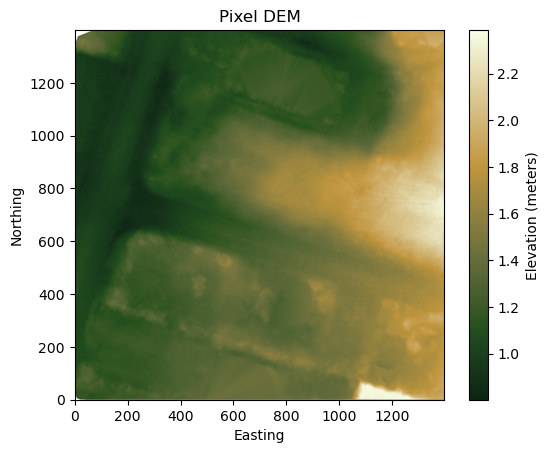

In [7]:
poseidon_core.grid_generator.plot_elev_grid(grid_z)

In [8]:
intrinsics = np.array([3040, # number of pixel columns
                       4056, # number of pixel rows
                       1503.0136, # U component of principal point
                       2163.4301, # V component of principal point
                       2330.4972, # U component of focal length
                       2334.0017, # V component of focal length
                       -0.3587, # radial distortion 
                       0.1388, # radial distortion
                       -0.0266, # radial distortion
                       -0.0046, # tangential distortion
                       0.0003 # tangential distortion
                       ])

# extrinsics = np.array([847955.4296, # camera x in world
#                        127408.728, # camera y in world
#                        4.4922, # camera elev in world
#                        4.38504, # azimuth
#                        1.14484, # tilt
#                        0.01305 # roll/swing
#                        ])
extrinsics = np.array([712159.597863065, # camera x in world
                       33136.9994153273, # camera y in world
                       3.72446811607855, # camera elev in world
                       1.30039127961854, # azimuth
                       1.02781393967485, # tilt
                       -0.160877893129538 # roll/swing
                       ])

In [9]:
rectifier = poseidon_core.ImageRectifier(intrinsics, extrinsics, grid_x, grid_y, grid_z, use_gpu=True)

[2025-10-27 08:53:26] --- Initializing ImageRectifier ---
[2025-10-27 08:53:26]   Mode: GPU (CuPy)
[2025-10-27 08:53:26]   Input grid shape: (1400, 1400)
[2025-10-27 08:53:26]   Starting distortion map computation (Ud, Vd)...
[2025-10-27 08:53:26]   ...Distortion map computation complete.
[2025-10-27 08:53:26] --- ImageRectifier Initialization Complete ---


In [6]:
rect_im = rectifier.merge_rectify('data/CAM_DE_01_20241020151826.jpg', verbose=True)

[2025-10-26 19:26:14] Rectifying single image: data/CAM_DE_01_20241020151826.jpg


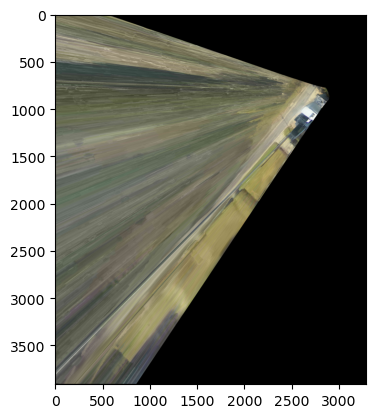

In [7]:
plt.imshow(np.flipud(rect_im.get()))

In [10]:
rectifier.merge_rectify_folder('data/flood_events/CB_03_20231002131313_20231002203713/labels', 
                               'data/flood_events/CB_03_20231002131313_20231002203713/zarr/labels', 
                               labels=True)

[2025-10-27 08:53:53] 
=== Starting Batch Rectification ===
[2025-10-27 08:53:53]   Source folder: data/flood_events/CB_03_20231002131313_20231002203713/labels
[2025-10-27 08:53:53]   Output Zarr store: data/flood_events/CB_03_20231002131313_20231002203713/zarr/labels
[2025-10-27 08:53:53]   Found 74 images to process.
[2025-10-27 08:53:53]   Processing image 1/74: CAM_CB_03_20231002133025_predseg_labels.png
[2025-10-27 08:53:53]   Processing image 7/74: CAM_CB_03_20231002132425_predseg_labels.png
[2025-10-27 08:53:54]   Processing image 14/74: CAM_CB_03_20231002184225_predseg_labels.png
[2025-10-27 08:53:55]   Processing image 21/74: CAM_CB_03_20231002191225_predseg_labels.png
[2025-10-27 08:53:55]   Processing image 28/74: CAM_CB_03_20231002190625_predseg_labels.png
[2025-10-27 08:53:56]   Processing image 35/74: CAM_CB_03_20231002200625_predseg_labels.png
[2025-10-27 08:53:57]   Processing image 42/74: CAM_CB_03_20231002173025_predseg_labels.png
[2025-10-27 08:53:57]   Processing im

In [11]:
processor = poseidon_core.DepthMapProcessor(grid_z, pond_edge_elev_plot_dir='data/flood_events/CB_03_20231002131313_20231002203713/plots')

In [12]:
processor.process_depth_maps('data/flood_events/CB_03_20231002131313_20231002203713/zarr/labels',
                             'data/flood_events/CB_03_20231002131313_20231002203713/zarr/depth_maps')

[2025-10-27 08:55:38] 
=== Starting Depth Map Generation ===
[2025-10-27 08:55:38]   Source Zarr directory: data/flood_events/CB_03_20231002131313_20231002203713/zarr/labels
[2025-10-27 08:55:38]   Output Zarr directory: data/flood_events/CB_03_20231002131313_20231002203713/zarr/depth_maps
[2025-10-27 08:55:38]   Found 74 rectified label arrays to process.
[2025-10-27 08:55:38]   Processing file 1/74: CAM_CB_03_20231002193025_predseg_labels_rectified
[2025-10-27 08:55:46]   Processing file 7/74: CAM_CB_03_20231002145425_predseg_labels_rectified
[2025-10-27 08:55:57]   Processing file 14/74: CAM_CB_03_20231002174825_predseg_labels_rectified
[2025-10-27 08:56:06]   Processing file 21/74: CAM_CB_03_20231002161225_predseg_labels_rectified
[2025-10-27 08:56:17]   Processing file 28/74: CAM_CB_03_20231002153625_predseg_labels_rectified
[2025-10-27 08:56:26]   Processing file 35/74: CAM_CB_03_20231002165425_predseg_labels_rectified
[2025-10-27 08:56:37]   Processing file 42/74: CAM_CB_03_2023

In [2]:
main_dir = 'data/flood_events'

# virtual_sensor_locs = np.array([[3174, 2691], [1900, 1657], [2362, 2092]])
virtual_sensor_locs = np.array([[125, 390], [75, 440], [5, 370], [9, 355]]) * 2

# min_x_extent = 847809.694
# max_x_extent = 847973.874
# min_y_extent = 127254.634
# max_y_extent = 127450.141
min_x_extent = 712160
max_x_extent = 712230
min_y_extent = 33100
max_y_extent = 33170

plotter = poseidon_core.DepthMapPlotter(main_dir, min_x_extent, max_x_extent, 
                                        min_y_extent, max_y_extent, 
                                        bbox_crs="EPSG:32119", 
                                        virtual_sensor_locations=virtual_sensor_locs, 
                                        plot_sensors=True)

In [15]:
plotter.process_single_flood_event('CB_03_20231002131313_20231002203713', ['95_perc'])

[2025-10-27 09:00:14] 
=== Processing Flood Event: CB_03_20231002131313_20231002203713 ===
[2025-10-27 09:00:14]   Source Zarr directory: data/flood_events/CB_03_20231002131313_20231002203713/zarr/depth_maps
[2025-10-27 09:00:14]   Filtering for stats: ['95_perc']
[2025-10-27 09:00:14]   Found 592 potential Zarr stores. 148 will be processed.
[2025-10-27 09:00:20]     -> Plot saved: data/flood_events/CB_03_20231002131313_20231002203713/plots/depth_maps/CAM_CB_03_20231002131826_predseg_labels_rectified_depth_map_95_perc.png
[2025-10-27 09:00:24]     -> Plot saved: data/flood_events/CB_03_20231002131313_20231002203713/plots/WSE_maps/CAM_CB_03_20231002131826_predseg_labels_rectified_wse_map_95_perc.png
[2025-10-27 09:00:28]     -> Plot saved: data/flood_events/CB_03_20231002131313_20231002203713/plots/depth_maps/CAM_CB_03_20231002132425_predseg_labels_rectified_depth_map_95_perc.png
[2025-10-27 09:00:33]     -> Plot saved: data/flood_events/CB_03_20231002131313_20231002203713/plots/WSE_ma

In [3]:
plotter.preprocess_flood_events()

Preprocessing flood events for plotting...:   0%|          | 0/2 [00:00<?, ?event/s]/home/rmccune/miniconda3/envs/poseidon/lib/python3.12/site-packages/zarr/core/dtype/npy/string.py:248: UnstableSpecificationWarning: The data type (FixedLengthUTF32(length=30, endianness='little')) does not have a Zarr V3 specification. That means that the representation of arrays saved with this data type may change without warning in a future version of Zarr Python. Arrays stored with this data type may be unreadable by other Zarr libraries. Use this data type at your own risk! Check https://github.com/zarr-developers/zarr-extensions/tree/main/data-types for the status of data type specifications for Zarr V3.
  v3_unstable_dtype_warning(self)
Preprocessing flood events for plotting...:  50%|█████     | 1/2 [00:04<00:04,  4.83s/event]/home/rmccune/miniconda3/envs/poseidon/lib/python3.12/site-packages/zarr/core/dtype/npy/string.py:248: UnstableSpecificationWarning: The data type (FixedLengthUTF32(length

In [3]:
flood_event_path = 'data/flood_events/DE_01_20240921105956_20240921231819'

plotter.plot_water_level_time_series(
                                    'CAM_DE_01_20240921203026.jpg',
                                    flood_event_path,
                                    'data/flood_events/DE_01_20240921105956_20240921231819/time_series'
                                    )


Time series plot saved to: data/flood_events/DE_01_20240921105956_20240921231819/time_series/CAM_DE_01_20240921203026_time_series.png


In [3]:
flood_event_path = 'data/flood_events/CB_03_20231002131313_20231002203713'

for filename in os.listdir('data/flood_events/CB_03_20231002131313_20231002203713/orig_images'):
    plotter.plot_water_level_time_series(filename,
                                flood_event_path, 
                                'data/flood_events/CB_03_20231002131313_20231002203713/time_series_using_depths'
                                )

Time series plot saved to: data/flood_events/CB_03_20231002131313_20231002203713/time_series_using_depths/CAM_CB_03_20231002180025_time_series.png
Time series plot saved to: data/flood_events/CB_03_20231002131313_20231002203713/time_series_using_depths/CAM_CB_03_20231002201825_time_series.png
Time series plot saved to: data/flood_events/CB_03_20231002131313_20231002203713/time_series_using_depths/CAM_CB_03_20231002152425_time_series.png
Time series plot saved to: data/flood_events/CB_03_20231002131313_20231002203713/time_series_using_depths/CAM_CB_03_20231002171825_time_series.png
Time series plot saved to: data/flood_events/CB_03_20231002131313_20231002203713/time_series_using_depths/CAM_CB_03_20231002144226_time_series.png
Time series plot saved to: data/flood_events/CB_03_20231002131313_20231002203713/time_series_using_depths/CAM_CB_03_20231002142425_time_series.png
Time series plot saved to: data/flood_events/CB_03_20231002131313_20231002203713/time_series_using_depths/CAM_CB_03_20